# Part 2: Initial EDA

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
new_england_df = pd.read_csv("../data/cleaned_new_england_covid.csv")
mid_atlantic_df = pd.read_csv("../data/cleaned_mid_atlantic_covid.csv")
south_df = pd.read_csv("../data/cleaned_south_covid.csv")
midwest_df = pd.read_csv("../data/cleaned_midwest_covid.csv")
southwest_df = pd.read_csv("../data/cleaned_southwest_covid.csv")
west_df = pd.read_csv("../data/cleaned_west_covid.csv")

In [139]:
def set_indexes(dfs):
    for df in dfs:
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)

In [141]:
set_indexes([new_england_df, mid_atlantic_df, south_df, midwest_df, southwest_df, west_df])

In [143]:
def column_to_title(column_name):
    return " ".join(list(word[0].capitalize() + word[1:] for word in column_name.split("_")))

In [145]:
def plot_column(dfs, column_name):
    plt.subplots(len(dfs), 1, figsize=(10, 10), tight_layout=True)
    for i, df in enumerate(dfs, 1):
        staffing_shortage = df.groupby("date").mean(numeric_only=True)[column_name]
        title = column_to_title(column_name)
        plt.subplot(len(dfs), 1, i)
        plt.plot(staffing_shortage.index, staffing_shortage)
        plt.title(f"{title} - {df.iloc[0,].region}")
    plt.savefig(f"../img/{column_name}_region.png", format="png", dpi=300)
    plt.show()

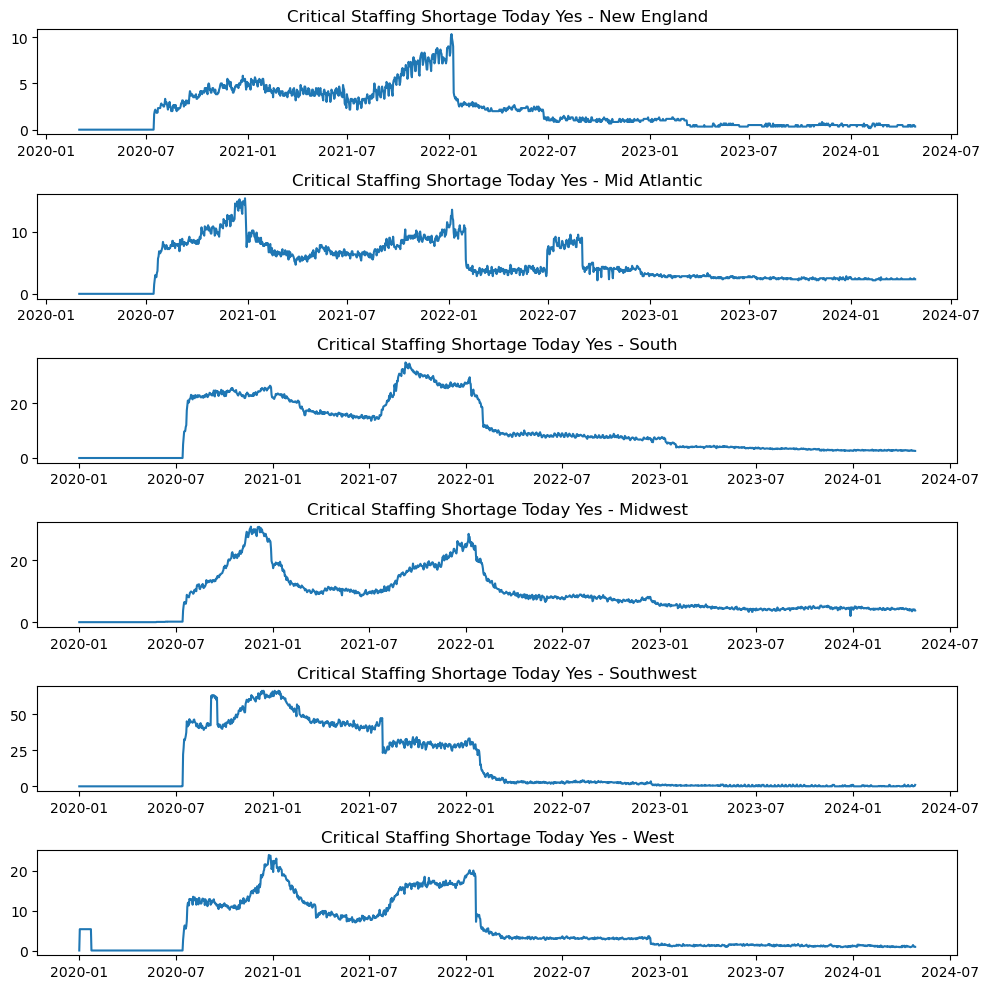

In [147]:
plot_column([new_england_df, mid_atlantic_df, south_df, midwest_df, southwest_df, west_df],
                                "critical_staffing_shortage_today_yes")

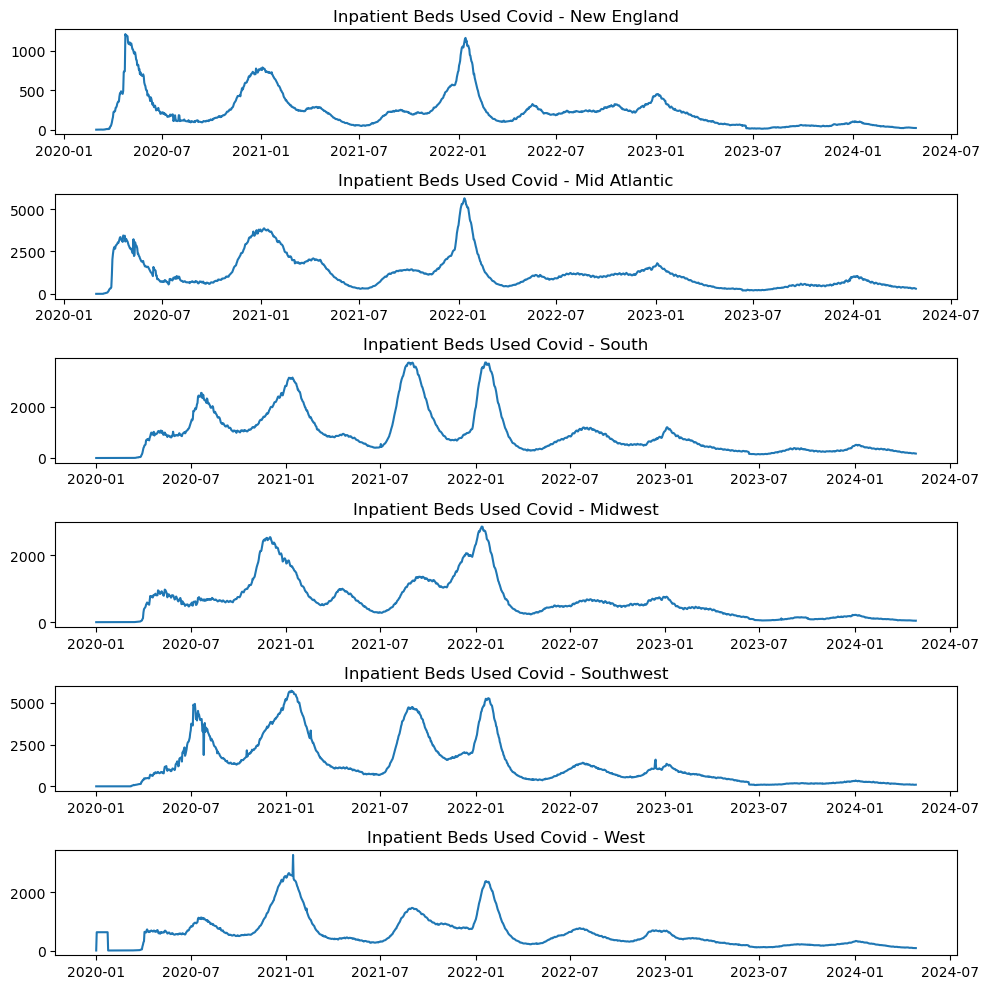

In [149]:
plot_column([new_england_df, mid_atlantic_df, south_df, midwest_df, southwest_df, west_df],
                                "inpatient_beds_used_covid")